In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [32]:
# define physical constants
mass = 0.2
Ixx = 0.008
g = 9.81

# set up initial conditions
y0, y_dot0, y_dotdot0 = 0, 0, 0
z0, z_dot0, z_dotdot0 = 0, 0, 0
phi0 = 0, 0

In [78]:
# define PD control parameters
Kp_y = 16
Kd_y = 3
Kp_z = 50
Kd_z = 12
Kp_phi = 800
Kd_phi = 30

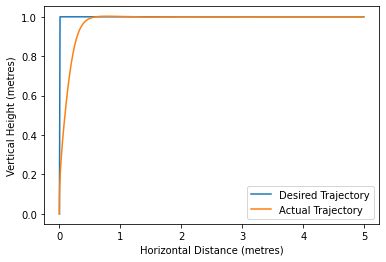

In [79]:
# simulation: horizontal motion at a fixed height
def const_height_traj(t):
    # return values [[y_des, vy_des, ay_des], [z_des, vz_des, az_des]]
    return [[t, 1, 0], [1, 0, 0]]

# define constant parameters
t_step = 0.01
n_iter = 500

t = np.arange(0.0, n_iter*t_step, t_step)

# setting up the arrays to store desired trajectory and actual trajectory
y, y_dot, y_dotdot = [0] * n_iter, [0] * n_iter, [0] * n_iter
y_des, y_dot_des, y_dotdot_des = [0] * n_iter, [0] * n_iter, [0] * n_iter
z, z_dot, z_dotdot = [0] * n_iter, [0] * n_iter, [0] * n_iter
z_des, z_dot_des, z_dotdot_des = [0] * n_iter, [0] * n_iter, [0] * n_iter
phi, phi_dot, phi_dotdot = [0] * n_iter, [0] * n_iter, [0] * n_iter
phi_des = [0] * n_iter
F = [0] * n_iter
tau = [0] * n_iter

# setting up the initial values for actual trajectory
y[0], y_dot[0], y_dotdot[0] = y0, y_dot0, y_dotdot0
z[0], z_dot[0], z_dotdot[0] = z0, z_dot0, z_dotdot0
F[0] = mass * g

# error = desired trajectory - actual trajectory
# the goal is to let the error decrease to zero quickly
# this allows us to determine the acceleration at any time instant
for i in range(1, n_iter):
    # feed in coordinates, velocities for desired trajectory
    y_des[i], y_dot_des[i], y_dotdot_des[i] = const_height_traj(i*t_step)[0]
    z_des[i], z_dot_des[i], z_dotdot_des[i] = const_height_traj(i*t_step)[1]

    
    # equations of motion for quadrotor in y, z and phi
    y_dotdot[i] = -F[i-1]/mass * np.sin(phi[i-1])
    z_dotdot[i] = F[i-1]/mass * np.cos(phi[i-1]) - g
    phi_dotdot[i] = tau[i-1] / Ixx
    
    # estimate actual trajectory using difference method
    y[i] = y[i-1] + y_dot[i-1] * t_step
    y_dot[i] = y_dot[i-1] + y_dotdot[i-1] * t_step
    z[i] = z[i-1] + z_dot[i-1] * t_step
    z_dot[i] = z_dot[i-1] + z_dotdot[i-1] * t_step
    phi[i] = phi[i-1] + phi_dot[i-1] * t_step
    phi_dot[i] = phi_dot[i-1] + phi_dotdot[i-1] * t_step
    
    # compute the required output from PD controller
    phi_des[i] = - (y_dotdot_des[i] + Kd_y * (y_dot_des[i] - y_dot[i]) + Kp_y * (y_des[i] - y[i])) / g
    F[i] = mass * (g + z_dotdot_des[i] + Kd_z * (z_dot_des[i] - z_dot[i]) + Kp_z * (z_des[i] - z[i]) )
    tau[i] = Ixx * (-Kd_phi * phi_dot[i] + Kp_phi * (phi_des[i] - phi[i]))

fig, ax = plt.subplots()

line1 = ax.plot(y_des, z_des, label='Desired Trajectory')
line2 = ax.plot(y, z, label='Actual Trajectory')

ax.legend()
plt.ylabel('Vertical Height (metres)')
plt.xlabel('Horizontal Distance (metres)')
plt.show()

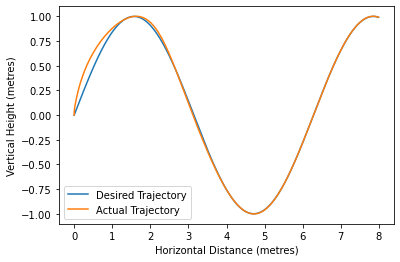

In [80]:
# simulation: fly along a sinusoidal path
def sine_traj(t):
    # return values [[y_des, vy_des, ay_des], [z_des, vz_des, az_des]]
    return [[t, 1, 0], [np.sin(t), np.cos(t), -np.sin(t)]]

# define PD control parameters
Kp_y = 6
Kd_y = 2
Kp_z = 30
Kd_z = 10
Kp_phi = 800
Kd_phi = 30

# define constant parameters
t_step = 0.01
n_iter = 800

t = np.arange(0.0, n_iter*t_step, t_step)

# setting up the arrays to store desired trajectory and actual trajectory
y, y_dot, y_dotdot = [0] * n_iter, [0] * n_iter, [0] * n_iter
y_des, y_dot_des, y_dotdot_des = [0] * n_iter, [0] * n_iter, [0] * n_iter
z, z_dot, z_dotdot = [0] * n_iter, [0] * n_iter, [0] * n_iter
z_des, z_dot_des, z_dotdot_des = [0] * n_iter, [0] * n_iter, [0] * n_iter
phi, phi_dot, phi_dotdot = [0] * n_iter, [0] * n_iter, [0] * n_iter
phi_des = [0] * n_iter
F = [0] * n_iter
tau = [0] * n_iter

# setting up the initial values for actual trajectory
y[0], y_dot[0], y_dotdot[0] = y0, y_dot0, y_dotdot0
z[0], z_dot[0], z_dotdot[0] = z0, z_dot0, z_dotdot0
F[0] = mass * g

# error = desired trajectory - actual trajectory
# the goal is to let the error decrease to zero quickly
# this allows us to determine the acceleration at any time instant
for i in range(1, n_iter):
    # feed in coordinates, velocities for desired trajectory
    y_des[i], y_dot_des[i], y_dotdot_des[i] = sine_traj(i*t_step)[0]
    z_des[i], z_dot_des[i], z_dotdot_des[i] = sine_traj(i*t_step)[1]

    
    # equations of motion for quadrotor in y, z and phi
    y_dotdot[i] = -F[i-1]/mass * np.sin(phi[i-1])
    z_dotdot[i] = F[i-1]/mass * np.cos(phi[i-1]) - g
    phi_dotdot[i] = tau[i-1] / Ixx
    
    # estimate actual trajectory using difference method
    y[i] = y[i-1] + y_dot[i-1] * t_step
    y_dot[i] = y_dot[i-1] + y_dotdot[i-1] * t_step
    z[i] = z[i-1] + z_dot[i-1] * t_step
    z_dot[i] = z_dot[i-1] + z_dotdot[i-1] * t_step
    phi[i] = phi[i-1] + phi_dot[i-1] * t_step
    phi_dot[i] = phi_dot[i-1] + phi_dotdot[i-1] * t_step
    
    # compute the required output from PD controller
    phi_des[i] = - (y_dotdot_des[i] + Kd_y * (y_dot_des[i] - y_dot[i]) + Kp_y * (y_des[i] - y[i])) / g
    F[i] = mass * (g + z_dotdot_des[i] + Kd_z * (z_dot_des[i] - z_dot[i]) + Kp_z * (z_des[i] - z[i]) )
    tau[i] = Ixx * (-Kd_phi * phi_dot[i] + Kp_phi * (phi_des[i] - phi[i]))

fig, ax = plt.subplots()

line1 = ax.plot(y_des, z_des, label='Desired Trajectory')
line2 = ax.plot(y, z, label='Actual Trajectory')

ax.legend()
plt.ylabel('Vertical Height (metres)')
plt.xlabel('Horizontal Distance (metres)')
plt.show()

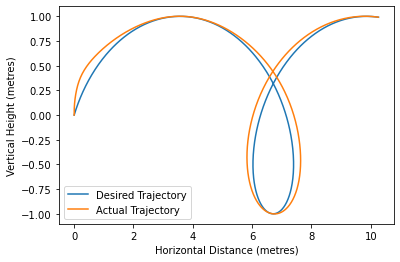

In [82]:
# simulation: fly along a spiral path
def spiral_traj(t):
    # return values [[y_des, vy_des, ay_des], [z_des, vz_des, az_des]]
    return [[2 + t - 2*np.cos(t), 1 + 2*np.sin(t), -2*np.cos(t)], [np.sin(t), np.cos(t), -np.sin(t)]]

# the roll angle does not stay small throughout the course
# so linearisation does not work as well as in previous cases
# PD parameters need to be modified to produce better control
Kp_y = 16
Kd_y = 3
Kp_z = 80
Kd_z = 15
Kp_phi = 800
Kd_phi = 30

# define constant parameters
t_step = 0.01
n_iter = 800

t = np.arange(0.0, n_iter*t_step, t_step)

# setting up the arrays to store desired trajectory and actual trajectory
y, y_dot, y_dotdot = [0] * n_iter, [0] * n_iter, [0] * n_iter
y_des, y_dot_des, y_dotdot_des = [0] * n_iter, [0] * n_iter, [0] * n_iter
z, z_dot, z_dotdot = [0] * n_iter, [0] * n_iter, [0] * n_iter
z_des, z_dot_des, z_dotdot_des = [0] * n_iter, [0] * n_iter, [0] * n_iter
phi, phi_dot, phi_dotdot = [0] * n_iter, [0] * n_iter, [0] * n_iter
phi_des = [0] * n_iter
F = [0] * n_iter
tau = [0] * n_iter

# setting up the initial values for actual trajectory
y[0], y_dot[0], y_dotdot[0] = y0, y_dot0, y_dotdot0
z[0], z_dot[0], z_dotdot[0] = z0, z_dot0, z_dotdot0
F[0] = mass * g

# error = desired trajectory - actual trajectory
# the goal is to let the error decrease to zero quickly
# this allows us to determine the acceleration at any time instant
for i in range(1, n_iter):
    # feed in coordinates, velocities for desired trajectory
    y_des[i], y_dot_des[i], y_dotdot_des[i] = spiral_traj(i*t_step)[0]
    z_des[i], z_dot_des[i], z_dotdot_des[i] = spiral_traj(i*t_step)[1]

    
    # equations of motion for quadrotor in y, z and phi
    y_dotdot[i] = -F[i-1]/mass * np.sin(phi[i-1])
    z_dotdot[i] = F[i-1]/mass * np.cos(phi[i-1]) - g
    phi_dotdot[i] = tau[i-1] / Ixx
    
    # estimate actual trajectory using difference method
    y[i] = y[i-1] + y_dot[i-1] * t_step
    y_dot[i] = y_dot[i-1] + y_dotdot[i-1] * t_step
    z[i] = z[i-1] + z_dot[i-1] * t_step
    z_dot[i] = z_dot[i-1] + z_dotdot[i-1] * t_step
    phi[i] = phi[i-1] + phi_dot[i-1] * t_step
    phi_dot[i] = phi_dot[i-1] + phi_dotdot[i-1] * t_step
    
    # compute the required output from PD controller
    phi_des[i] = - (y_dotdot_des[i] + Kd_y * (y_dot_des[i] - y_dot[i]) + Kp_y * (y_des[i] - y[i])) / g
    F[i] = mass * (g + z_dotdot_des[i] + Kd_z * (z_dot_des[i] - z_dot[i]) + Kp_z * (z_des[i] - z[i]) )
    tau[i] = Ixx * (-Kd_phi * phi_dot[i] + Kp_phi * (phi_des[i] - phi[i]))

fig, ax = plt.subplots()

line1 = ax.plot(y_des, z_des, label='Desired Trajectory')
line2 = ax.plot(y, z, label='Actual Trajectory')

ax.legend()
plt.ylabel('Vertical Height (metres)')
plt.xlabel('Horizontal Distance (metres)')
plt.show()